In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))

train_df = pd.read_csv(r'D:\onss\대학원\딥러닝개론\lec5_asl_data/sign_mnist_train.csv')
test_df = pd.read_csv(r'D:\onss\대학원\딥러닝개론\lec5_asl_data/sign_mnist_valid.csv')

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


<Figure size 2880x2880 with 0 Axes>

In [2]:
y_train = train_df['label']
y_test = test_df['label']

del train_df['label']
del test_df['label']

x_train = train_df.values
x_test = test_df.values

In [3]:
print(x_train.shape, x_test.shape)

(27455, 784) (7172, 784)


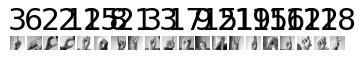

In [4]:
num_images = 20

for i in range(num_images):
    row = x_train[i]
    label = y_train[i]

    image = row.reshape(28,28)
    plt.subplot(1, num_images, i+1)
    plt.title(label, fontdict={'fontsize': 30})
    plt.axis('off')
    plt.imshow(image, cmap='gray')

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

class ASL_Dataset(Dataset):
    def __init__(self, path):
        super(ASL_Dataset, self).__init__()

        train_df = pd.read_csv(path)
        y_train = train_df['label']
        del train_df['label']
        x_train = train_df.values

        # preprocessing
        x_train = np.array(x_train)
        y_train = np.array(y_train)
        x_train = x_train / 255.

        # tensor
        self.x_train_tensor = torch.tensor(x_train).float()
        self.y_train_tensor = torch.tensor(y_train)

    def __getitem__(self, index):
        return self.x_train_tensor[index], self.y_train_tensor[index]

    def __len__(self):
        return self.x_train_tensor.shape[0]

In [6]:
training_data = ASL_Dataset(r'D:\onss\대학원\딥러닝개론\lec5_asl_data/sign_mnist_train.csv')
testing_data = ASL_Dataset(r'D:\onss\대학원\딥러닝개론\lec5_asl_data/sign_mnist_valid.csv')

In [7]:
train_loader = DataLoader(dataset=training_data, batch_size=1000, shuffle=True)

In [8]:
import torch.nn as nn

In [9]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 24)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)  # unnormalized log-probability

        return x

net = Net()

In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)

In [13]:
for epoch in range(20):
    loss_val = 0

    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()

        inputs, labels = data

        pred = net(inputs)
        loss = loss_function(pred, labels)

        loss.backward()  # compute parameter gradient
        optimizer.step() # parameter update

        loss_val += loss.item()

    print(f"Epoch : {epoch + 1}, Loss : {loss_val}")

Epoch : 1, Loss : 19.5159769654274
Epoch : 2, Loss : 18.763429284095764
Epoch : 3, Loss : 17.85613203048706
Epoch : 4, Loss : 17.004029273986816
Epoch : 5, Loss : 16.335731267929077
Epoch : 6, Loss : 15.665414869785309
Epoch : 7, Loss : 14.91667565703392
Epoch : 8, Loss : 14.353871613740921
Epoch : 9, Loss : 13.724290668964386
Epoch : 10, Loss : 12.838408797979355
Epoch : 11, Loss : 12.365344315767288
Epoch : 12, Loss : 12.014793813228607
Epoch : 13, Loss : 11.358704179525375
Epoch : 14, Loss : 10.889197617769241
Epoch : 15, Loss : 10.705164551734924
Epoch : 16, Loss : 10.312324047088623
Epoch : 17, Loss : 9.365476608276367
Epoch : 18, Loss : 8.930757969617844
Epoch : 19, Loss : 8.578934788703918
Epoch : 20, Loss : 8.240814730525017


In [14]:
input_test = testing_data.x_train_tensor
pred_test = net(input_test)
pred_category = torch.argmax(pred_test, dim=1)

label_test = testing_data.y_train_tensor
accu = torch.mean((pred_category == label_test).float())

print(f'Test Accuracy : {accu}')

Test Accuracy : 0.6851645112037659
